# Notebook to make the graphs

## Reading the CSV files with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step-by-step / No self-correction

metrics_step_no_corr = pd.read_csv("experiments\metrics_gpt-4o_2025-06-23T09-42-16.csv")

# Direct / No self-correction"

metrics_direct_no_corr = pd.read_csv("experiments\metrics_gpt-4o_2025-06-24T09-06-23.csv")

# Step-by-step / Self-correction"

metrics_step_corr = pd.read_csv("experiments\metrics_gpt-4o_2025-06-19T13-00-32.csv")
    
# Direct / Self-correction

metrics_direct_corr = pd.read_csv("experiments\metrics_gpt-4o_2025-06-24T23-34-53.csv")

In [2]:
metrics_step_corr

,code_tag,llm_used,prompt_version,query_id,query_run,sql_query,tab_schema,label,query_gen_time,query_gen_date,query_results,query_error,sql_time,sql_date,r_row,p_row,r_col,p_col,N_perfect_row,N_perfect_col
0,0.18.0,NaN,NaN,8,0,\r\nSELECT\r\n *\r\nFROM\r\n object\r\nI...,NaN,NaN,NaN,NaN,[ oid ndethist ncovhist mjdsta...,NaN,17.736036,2025-06-16T11:55:33,1.000,1.000,1.0,1.0,1.0,1.0
1,0.18.0,gpt-4o,v2,8,1,\n# Sub-query to filter objects classified as ...,['\nCREATE TABLE object ( /* this is the most ...,medium,15.343609,2025-06-16T00:43:43,[None],(psycopg2.errors.QueryCanceled) canceling stat...,254.071243,2025-06-16T11:59:47,0.000,0.000,0.0,0.0,0.0,0.0
2,0.18.0,gpt-4o,v2,8,2,"\nsubquery_probability = """"""\nSELECT oid\nFROM...",['\nCREATE TABLE object ( /* this is the most ...,medium,13.397779,2025-06-16T00:43:57,[None],(psycopg2.errors.QueryCanceled) canceling stat...,277.042510,2025-06-16T12:04:24,0.000,0.000,0.0,0.0,0.0,0.0
3,0.18.0,gpt-4o,v2,8,3,"\nsubquery_probability = """"""\nSELECT oid\nFROM...",['\nCREATE TABLE object ( /* this is the most ...,medium,11.281793,2025-06-16T00:44:08,[None],(psycopg2.errors.QueryCanceled) canceling stat...,258.219027,2025-06-16T12:08:43,0.000,0.000,0.0,0.0,0.0,0.0
4,0.18.0,gpt-4o,v2,8,4,"\nsubquery_probability = """"""\nSELECT oid\nFROM...",['\nCREATE TABLE object ( /* this is the most ...,medium,10.662756,2025-06-16T00:44:19,[None],(psycopg2.errors.QueryCanceled) canceling stat...,255.151105,2025-06-16T12:12:58,0.000,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.18.0,gpt-4o,v2,39,6,\n# Subquery to filter objects classified as '...,['\nCREATE TABLE object ( /* this is the most ...,advanced,20.798696,2025-06-16T11:44:46,[ oid candid f_id ...,NaN,23.919749,2025-06-19T15:47:22,0.964,0.972,0.5,0.5,0.0,0.0
568,0.18.0,gpt-4o,v2,39,7,\n# Subquery for Probability\nprobability_subq...,['\nCREATE TABLE object ( /* this is the most ...,advanced,20.827849,2025-06-16T11:45:07,[None],(psycopg2.errors.QueryCanceled) canceling stat...,251.884966,2025-06-19T15:51:40,0.000,0.000,0.0,0.0,0.0,0.0
569,0.18.0,gpt-4o,v2,39,8,\n# Subquery to filter objects classified as '...,['\nCREATE TABLE object ( /* this is the most ...,advanced,22.779104,2025-06-16T11:45:30,[ oid candid f_id ...,NaN,16.889445,2025-06-19T15:52:02,0.079,0.079,0.5,0.5,0.0,0.0
570,0.18.0,gpt-4o,v2,39,9,\n# Subquery to filter objects with the highes...,['\nCREATE TABLE object ( /* this is the most ...,advanced,30.387050,2025-06-16T11:46:01,[ oid candid f_id ...,NaN,14.382629,2025-06-19T15:52:22,0.964,0.972,0.5,0.4,0.0,0.0


In [10]:
df_pred = pd.read_csv("datasets/txt2sql_alerce_test_v3_1.csv")
df_pred[df_pred["req_id"] == 39]["request"].item()

"Get the columns that contains: object identifier, candidate identifier, filter id as 'f_id', co-ordinates, magnitude, magnitude errors. Then, filter out sources with the highest probability class for objects as CV/Nova by the stochastic light curve classifier, with a number of detections of at most 50 from discovery date to last detection and collect the corrected difference magnitude in the r-band filter. Also, among them, determine their PSF corrected magnitude in the r-filter, then get maximum rise from minimum in each detection. Give the first 1000 rows of the result, order by object identifier."

In [6]:
print(metrics_step_corr[(metrics_step_corr["query_id"] == 39) & (metrics_step_corr["query_run"] == 0)]["sql_query"].item())

SELECT
  sq.oid, sq.meanra, sq.meandec,
  detection.candid, detection.fid as f_id,detection.magpsf, detection.sigmapsf_corr, detection.sigmapsf_corr_ext
FROM
  (
SELECT
    object.oid, object.meanra, object.meandec, object.ndet
FROM
    object INNER JOIN
    probability
    ON object.oid = probability.oid
WHERE
    probability.classifier_name='lc_classifier_stochastic'
    AND probability.class_name='CV/Nova'
    AND probability.ranking = 1
) AS sq
  INNER JOIN detection
  ON sq.oid = detection.oid
WHERE
  sq.ndet < 50
  AND detection.fid = 2
ORDER BY oid
LIMIT 1000



In [14]:
temp = metrics_step_corr[(metrics_step_corr["query_id"] == 39)]
for i in range(len(temp)):
    print(temp.iloc[i]["sql_query"])
    print("-"*100)

SELECT
  sq.oid, sq.meanra, sq.meandec,
  detection.candid, detection.fid as f_id,detection.magpsf, detection.sigmapsf_corr, detection.sigmapsf_corr_ext
FROM
  (
SELECT
    object.oid, object.meanra, object.meandec, object.ndet
FROM
    object INNER JOIN
    probability
    ON object.oid = probability.oid
WHERE
    probability.classifier_name='lc_classifier_stochastic'
    AND probability.class_name='CV/Nova'
    AND probability.ranking = 1
) AS sq
  INNER JOIN detection
  ON sq.oid = detection.oid
WHERE
  sq.ndet < 50
  AND detection.fid = 2
ORDER BY oid
LIMIT 1000

----------------------------------------------------------------------------------------------------

# Subquery for Probability
probability_subquery = """
SELECT oid
FROM probability
WHERE class_name = 'CV/Nova'
AND classifier_name = 'lc_classifier_stochastic'
AND ranking = 1
"""

# Subquery for Object
object_subquery = """
SELECT oid
FROM object
WHERE ndet <= 50
"""

# Subquery for Detection
detection_subquery = """
SELE

## Making the graphs

### No self-correction

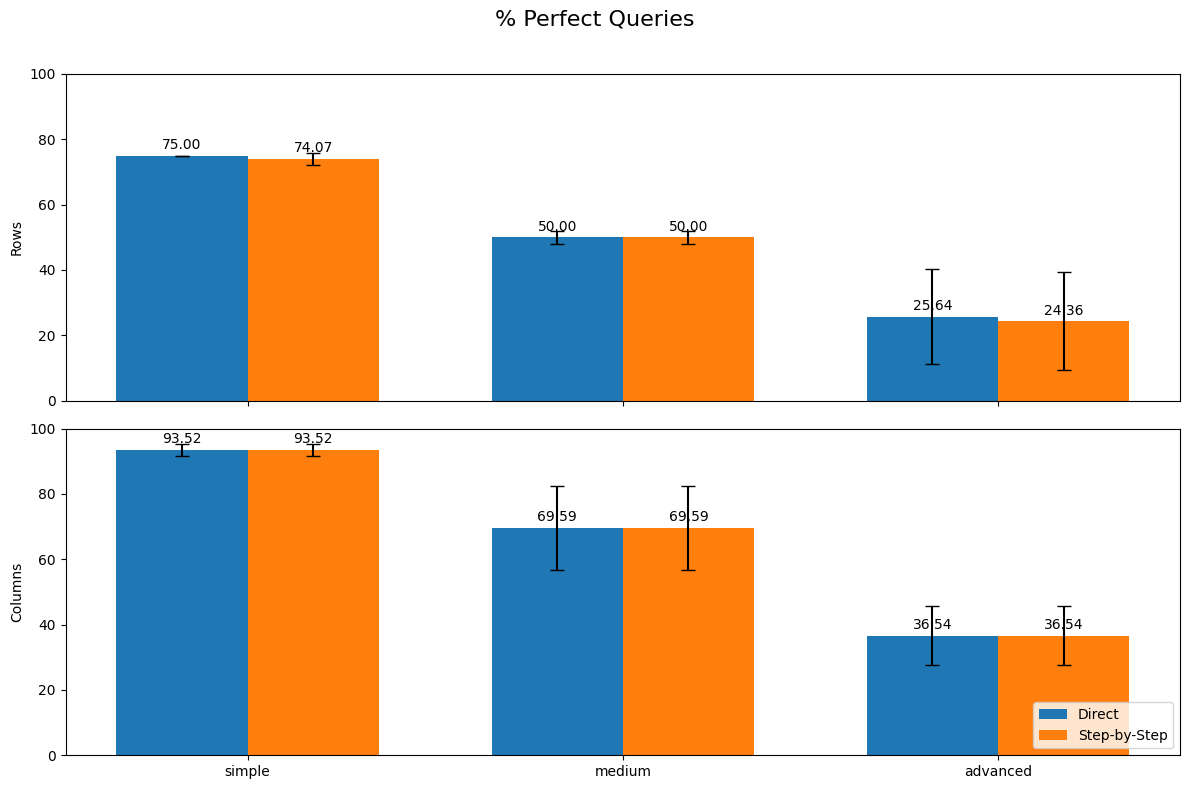

In [33]:
# Add prompt type before combining
metrics_direct_no_corr['prompt_type'] = 'Direct'
metrics_step_no_corr['prompt_type'] = 'Step-by-Step'

# Deleting the gold queries for this graphs
metrics_direct_no_corr = metrics_direct_no_corr[metrics_direct_no_corr["query_run"] != 0]
metrics_step_no_corr = metrics_step_no_corr[metrics_step_no_corr["query_run"] != 0]

# Combine the two
df_all = pd.concat([metrics_direct_no_corr, metrics_step_no_corr], ignore_index=True)

# Define and enforce difficulty ordering
difficulty_order = ['simple', 'medium', 'advanced']
df_all['label'] = pd.Categorical(df_all['label'], categories=difficulty_order, ordered=True)

# Group by label and prompt_type
summary_rows = []
summary_cols = []

for label in difficulty_order:
    for prompt in ['Direct', 'Step-by-Step']:
        subset = df_all[(df_all['label'] == label) & (df_all['prompt_type'] == prompt)]
        
        # ---- Rows ----
        row_means = subset['N_perfect_row'].mean()
        row_stds = subset.groupby('query_id')['N_perfect_row'].std().sort_index().mean()
        
        # ---- Columns ----
        col_means = subset['N_perfect_col'].mean()
        col_stds = subset.groupby('query_id')['N_perfect_col'].std().sort_index().mean()

        summary_rows.append({
            'label': label,
            'prompt_type': prompt,
            'mean_row': row_means * 100,
            'std_row': row_stds * 100
        })

        summary_cols.append({
            'label': label,
            'prompt_type': prompt,
            'mean_col': col_means * 100,
            'std_col': col_stds * 100
        })

# Convert to DataFrames
rows_df = pd.DataFrame(summary_rows)
cols_df = pd.DataFrame(summary_cols)

# Merge
summary = pd.merge(rows_df, cols_df, on=['label', 'prompt_type'])

# Sort values for consistent plotting
summary['label'] = pd.Categorical(summary['label'], categories=difficulty_order, ordered=True)
summary = summary.sort_values(['label', 'prompt_type'])

# Split by prompt type
direct = summary[summary['prompt_type'] == 'Direct']
step = summary[summary['prompt_type'] == 'Step-by-Step']

# Define bar plot parameters
x = np.arange(len(difficulty_order))  # x locations
width = 0.35

# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle('% Perfect Queries', fontsize=16)

# ===== ROW PLOT =====
axs[0].bar(x - width/2, direct['mean_row'], width, yerr=direct['std_row'], capsize=5, label='Direct')
axs[0].bar(x + width/2, step['mean_row'], width, yerr=step['std_row'], capsize=5, label='Step-by-Step')
axs[0].set_ylabel("Rows")
axs[0].set_ylim(0, 100)

# Annotate bars
for i in range(len(x)):
    axs[0].text(x[i] - width/2, direct['mean_row'].values[i] + 2, f"{direct['mean_row'].values[i]:.2f}", ha='center')
    axs[0].text(x[i] + width/2, step['mean_row'].values[i] + 2, f"{step['mean_row'].values[i]:.2f}", ha='center')

# ===== COLUMN PLOT =====
axs[1].bar(x - width/2, direct['mean_col'], width, yerr=direct['std_col'], capsize=5, label='Direct')
axs[1].bar(x + width/2, step['mean_col'], width, yerr=step['std_col'], capsize=5, label='Step-by-Step')
axs[1].set_ylabel("Columns")
axs[1].set_ylim(0, 100)

# Annotate bars
for i in range(len(x)):
    axs[1].text(x[i] - width/2, direct['mean_col'].values[i] + 2, f"{direct['mean_col'].values[i]:.2f}", ha='center')
    axs[1].text(x[i] + width/2, step['mean_col'].values[i] + 2, f"{step['mean_col'].values[i]:.2f}", ha='center')

# X-axis labels
axs[1].set_xticks(x)
axs[1].set_xticklabels(difficulty_order)

# Legend
axs[1].legend(loc="lower right")

# Tight layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


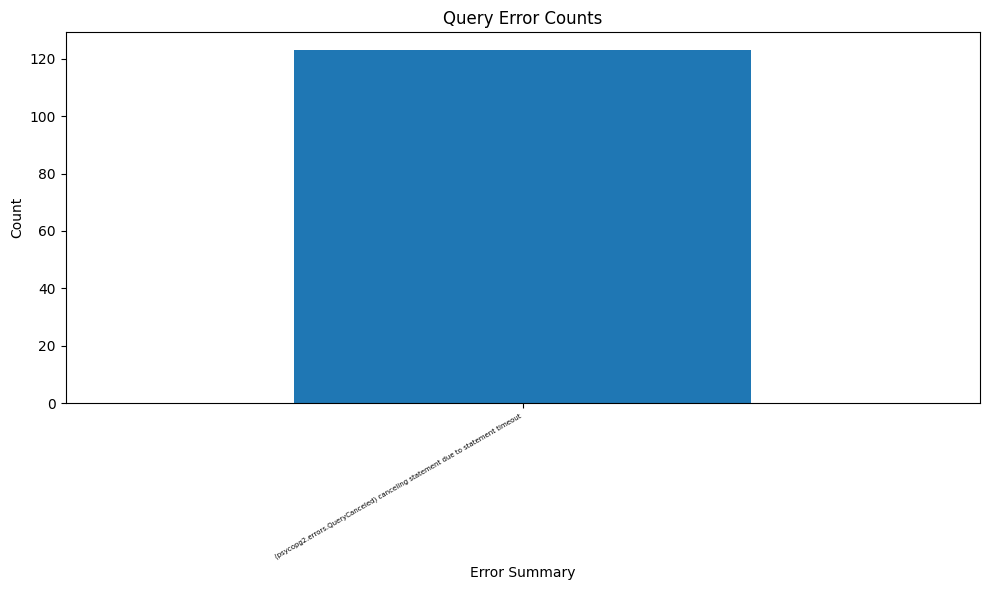

In [34]:
# Apply the transformation
processed = [
    x.split("\n\n")[0] if isinstance(x, str) else None
    for x in df_all["query_error"]
]

counts = pd.Series(processed).value_counts(dropna=True)
counts = counts[counts > 10]
# counts.index = counts.index.fillna('NaN')

# Plot with better spacing
plt.figure(figsize=(10, 6))  # Make the plot wider
ax = counts.plot(kind='bar')

plt.title('Query Error Counts')
plt.xlabel('Error Summary')
plt.ylabel('Count')

# Improve spacing of x-axis labels
plt.xticks(
    ticks=range(len(counts)),
    labels=counts.index,
    rotation=30,     # Rotate slightly
    ha='right',      # Align right
    fontsize=5      # Optional: reduce font size
)

plt.tight_layout()
plt.show()

### With self-correction

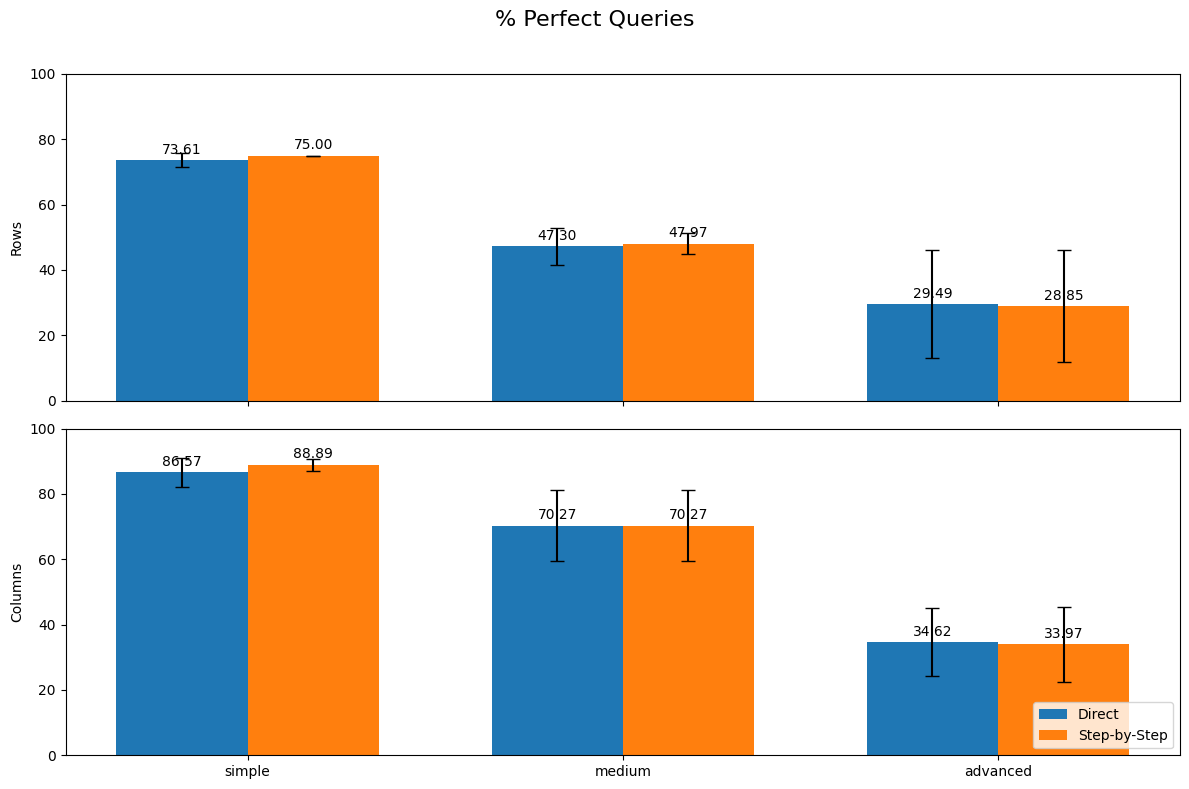

In [35]:
# Add prompt type before combining
metrics_direct_corr['prompt_type'] = 'Direct'
metrics_step_corr['prompt_type'] = 'Step-by-Step'

# Deleting the gold queries for this graphs
metrics_direct_corr = metrics_direct_corr[metrics_direct_corr["query_run"] != 0]
metrics_step_corr = metrics_step_corr[metrics_step_corr["query_run"] != 0]

# Combine the two
df_all = pd.concat([metrics_direct_corr, metrics_step_corr], ignore_index=True)

# Define and enforce difficulty ordering
difficulty_order = ['simple', 'medium', 'advanced']
df_all['label'] = pd.Categorical(df_all['label'], categories=difficulty_order, ordered=True)

# Group by label and prompt_type
summary_rows = []
summary_cols = []

for label in difficulty_order:
    for prompt in ['Direct', 'Step-by-Step']:
        subset = df_all[(df_all['label'] == label) & (df_all['prompt_type'] == prompt)]
        
        # ---- Rows ----
        row_means = subset['N_perfect_row'].mean()
        row_stds = subset.groupby('query_id')['N_perfect_row'].std().sort_index().mean()
        
        # ---- Columns ----
        col_means = subset['N_perfect_col'].mean()
        col_stds = subset.groupby('query_id')['N_perfect_col'].std().sort_index().mean()

        summary_rows.append({
            'label': label,
            'prompt_type': prompt,
            'mean_row': row_means * 100,
            'std_row': row_stds * 100
        })

        summary_cols.append({
            'label': label,
            'prompt_type': prompt,
            'mean_col': col_means * 100,
            'std_col': col_stds * 100
        })

# Convert to DataFrames
rows_df = pd.DataFrame(summary_rows)
cols_df = pd.DataFrame(summary_cols)

# Merge
summary = pd.merge(rows_df, cols_df, on=['label', 'prompt_type'])

# Sort values for consistent plotting
summary['label'] = pd.Categorical(summary['label'], categories=difficulty_order, ordered=True)
summary = summary.sort_values(['label', 'prompt_type'])

# Split by prompt type
direct = summary[summary['prompt_type'] == 'Direct']
step = summary[summary['prompt_type'] == 'Step-by-Step']

# Define bar plot parameters
x = np.arange(len(difficulty_order))  # x locations
width = 0.35

# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle('% Perfect Queries', fontsize=16)

# ===== ROW PLOT =====
axs[0].bar(x - width/2, direct['mean_row'], width, yerr=direct['std_row'], capsize=5, label='Direct')
axs[0].bar(x + width/2, step['mean_row'], width, yerr=step['std_row'], capsize=5, label='Step-by-Step')
axs[0].set_ylabel("Rows")
axs[0].set_ylim(0, 100)

# Annotate bars
for i in range(len(x)):
    axs[0].text(x[i] - width/2, direct['mean_row'].values[i] + 2, f"{direct['mean_row'].values[i]:.2f}", ha='center')
    axs[0].text(x[i] + width/2, step['mean_row'].values[i] + 2, f"{step['mean_row'].values[i]:.2f}", ha='center')

# ===== COLUMN PLOT =====
axs[1].bar(x - width/2, direct['mean_col'], width, yerr=direct['std_col'], capsize=5, label='Direct')
axs[1].bar(x + width/2, step['mean_col'], width, yerr=step['std_col'], capsize=5, label='Step-by-Step')
axs[1].set_ylabel("Columns")
axs[1].set_ylim(0, 100)

# Annotate bars
for i in range(len(x)):
    axs[1].text(x[i] - width/2, direct['mean_col'].values[i] + 2, f"{direct['mean_col'].values[i]:.2f}", ha='center')
    axs[1].text(x[i] + width/2, step['mean_col'].values[i] + 2, f"{step['mean_col'].values[i]:.2f}", ha='center')

# X-axis labels
axs[1].set_xticks(x)
axs[1].set_xticklabels(difficulty_order)

# Legend
axs[1].legend(loc="lower right")

# Tight layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

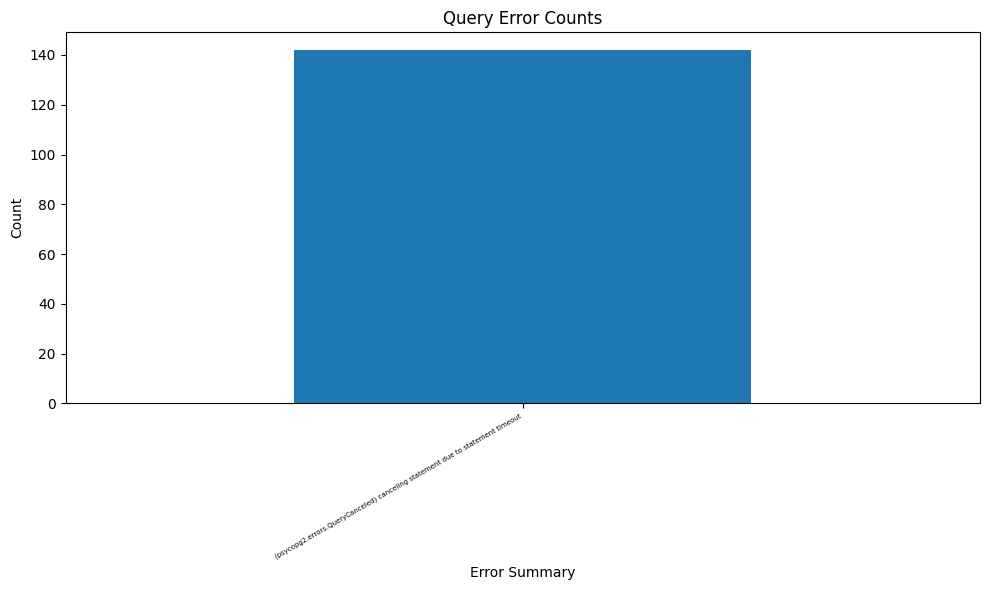

In [36]:
# Apply the transformation
processed = [
    x.split("\n\n")[0] if isinstance(x, str) else None
    for x in df_all["query_error"]
]

counts = pd.Series(processed).value_counts(dropna=True)
counts = counts[counts > 10]
# counts.index = counts.index.fillna('NaN')

# Plot with better spacing
plt.figure(figsize=(10, 6))  # Make the plot wider
ax = counts.plot(kind='bar')

plt.title('Query Error Counts')
plt.xlabel('Error Summary')
plt.ylabel('Count')

# Improve spacing of x-axis labels
plt.xticks(
    ticks=range(len(counts)),
    labels=counts.index,
    rotation=30,     # Rotate slightly
    ha='right',      # Align right
    fontsize=5      # Optional: reduce font size
)

plt.tight_layout()
plt.show()